In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/average-time-spent-by-a-user-on-social-media/dummy_data.csv


In [2]:
df=pd.read_csv("/kaggle/input/average-time-spent-by-a-user-on-social-media/dummy_data.csv")

# Data Overview:

In [3]:
df

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


There is no null values and there are 1000 rows and 12 columns

In [5]:
df.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


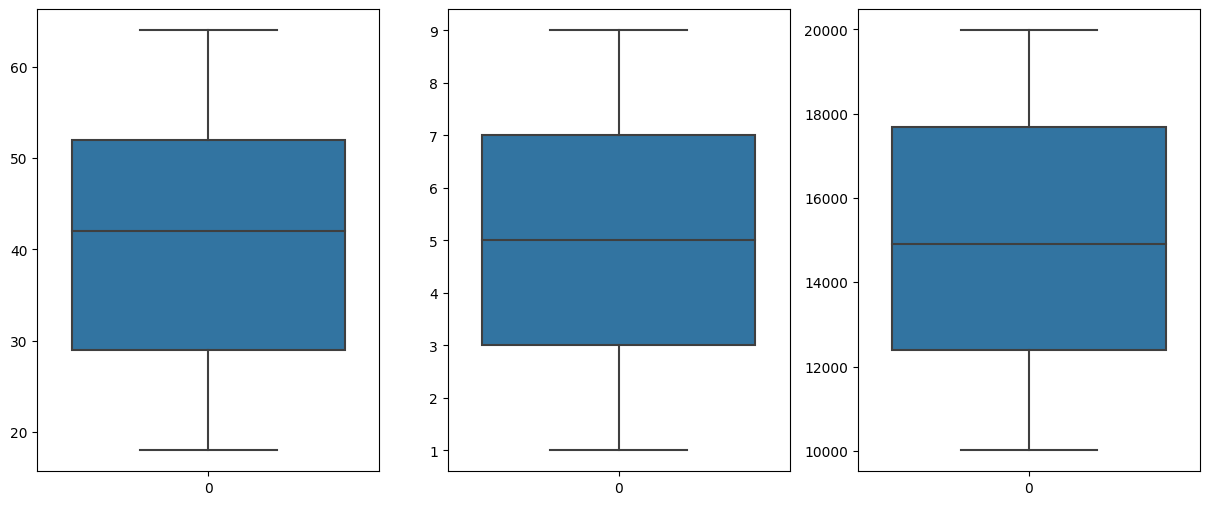

In [6]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(df.age)
plt.subplot(1,3,2)
sns.boxplot(df.time_spent)
plt.subplot(1,3,3)
sns.boxplot(df.income)
plt.show()

There are no ouliners

In [7]:
df.gender.value_counts()

gender
male          337
non-binary    332
female        331
Name: count, dtype: int64

In [8]:
df.platform.value_counts()

platform
Instagram    363
YouTube      330
Facebook     307
Name: count, dtype: int64

In [9]:
df.interests.value_counts()

interests
Lifestlye    341
Sports       331
Travel       328
Name: count, dtype: int64

In [10]:
df.location.value_counts()

location
Australia         352
United Kingdom    329
United States     319
Name: count, dtype: int64

In [11]:
df.demographics.value_counts()

demographics
Rural        340
Sub_Urban    335
Urban        325
Name: count, dtype: int64

In [12]:
df.profession.value_counts()

profession
Marketer Manager     355
Software Engineer    336
Student              309
Name: count, dtype: int64

In [13]:
df.indebt.value_counts()

indebt
False    503
True     497
Name: count, dtype: int64

In [14]:
df.isHomeOwner.value_counts()

isHomeOwner
True     508
False    492
Name: count, dtype: int64

In [15]:
df.Owns_Car.value_counts()

Owns_Car
True     539
False    461
Name: count, dtype: int64

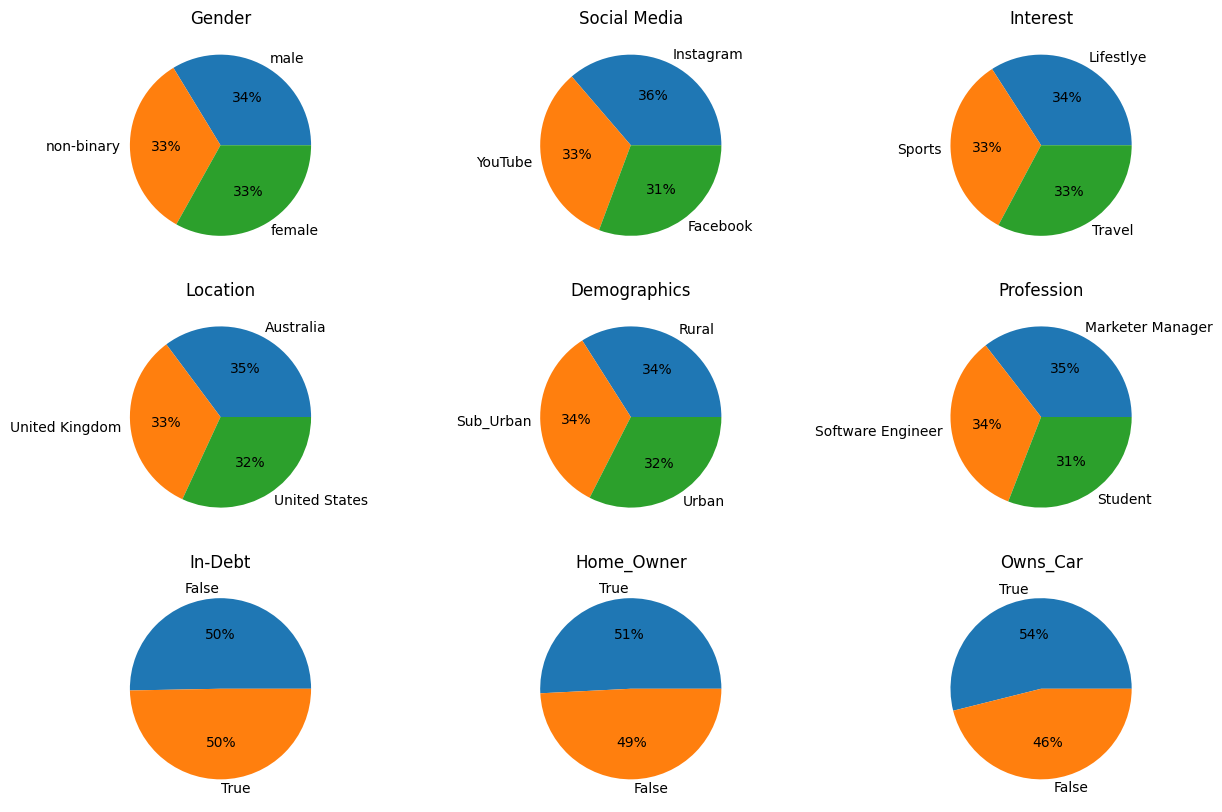

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
plt.pie(df.gender.value_counts(), labels=df.gender.value_counts().index, autopct='%.0f%%')
plt.title('Gender')
plt.subplot(3,3,2)
plt.pie(df.platform.value_counts(), labels=df.platform.value_counts().index, autopct='%.0f%%')
plt.title('Social Media')
plt.subplot(3,3,3)
plt.pie(df.interests.value_counts(), labels=df.interests.value_counts().index, autopct='%.0f%%')
plt.title('Interest')
plt.subplot(3,3,4)
plt.pie(df.location.value_counts(), labels=df.location.value_counts().index, autopct='%.0f%%')
plt.title('Location')
plt.subplot(3,3,5)
plt.pie(df.demographics.value_counts(), labels=df.demographics.value_counts().index, autopct='%.0f%%')
plt.title('Demographics')
plt.subplot(3,3,6)
plt.pie(df.profession.value_counts(), labels=df.profession.value_counts().index, autopct='%.0f%%')
plt.title('Profession')
plt.subplot(3,3,7)
plt.pie(df.indebt.value_counts(), labels=df.indebt.value_counts().index, autopct='%.0f%%')
plt.title('In-Debt')
plt.subplot(3,3,8)
plt.pie(df.isHomeOwner.value_counts(), labels=df.isHomeOwner.value_counts().index, autopct='%.0f%%')
plt.title('Home_Owner')
plt.subplot(3,3,9)
plt.pie(df.Owns_Car.value_counts(), labels=df.Owns_Car.value_counts().index, autopct='%.0f%%')
plt.title('Owns_Car')
plt.show()

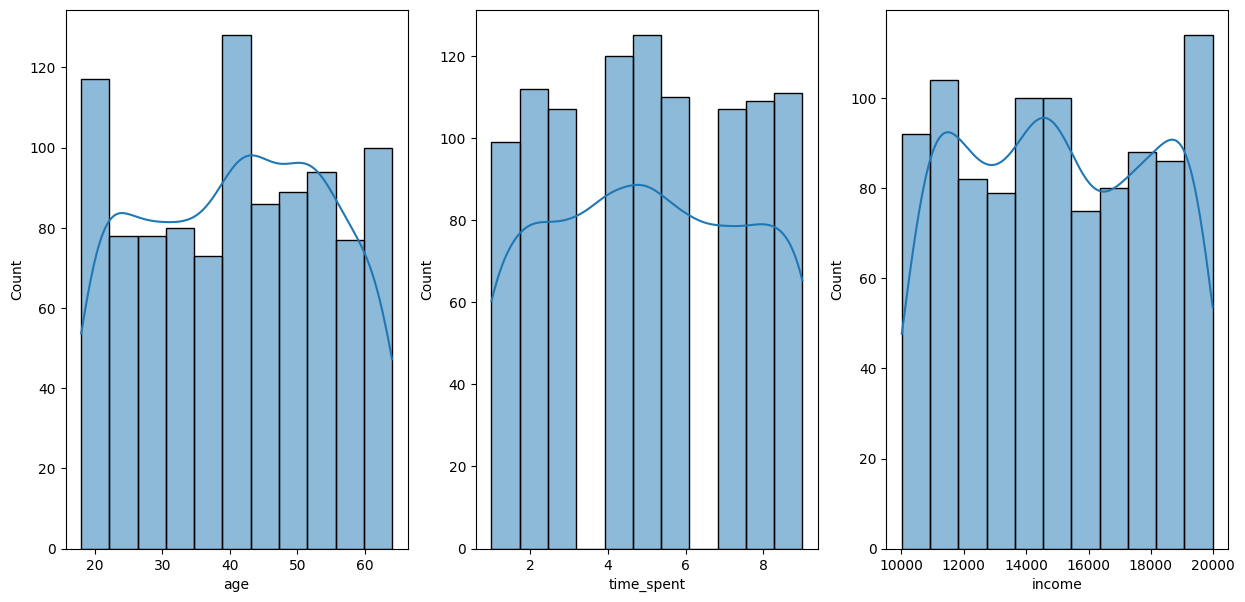

In [17]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
sns.histplot(df.age, kde=True)
plt.subplot(1,3,2)
sns.histplot(df.time_spent, kde=True)
plt.subplot(1,3,3)
sns.histplot(df.income, kde=True)
plt.show()

In [18]:
df1=df
df1.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [19]:
def temp(x):
    if x==True:
        return 1
    else:
        return 0

In [20]:
df1.indebt=df1.indebt.apply(temp)
df1.isHomeOwner=df1.isHomeOwner.apply(temp)
df1.Owns_Car=df1.Owns_Car.apply(temp)

In [21]:
df[['age', 'time_spent', 'income', 'indebt', 'isHomeOwner', 'Owns_Car']].corr()

,age,time_spent,income,indebt,isHomeOwner,Owns_Car
age,1.000000,-0.033827,-0.087391,-0.017055,-0.005321,0.006921
time_spent,-0.033827,1.000000,0.004757,0.013079,0.029388,-0.020271
income,-0.087391,0.004757,1.000000,0.037860,0.006072,0.019789
indebt,-0.017055,0.013079,0.037860,1.000000,0.038102,-0.035641
isHomeOwner,-0.005321,0.029388,0.006072,0.038102,1.000000,-0.051411
Owns_Car,0.006921,-0.020271,0.019789,-0.035641,-0.051411,1.000000


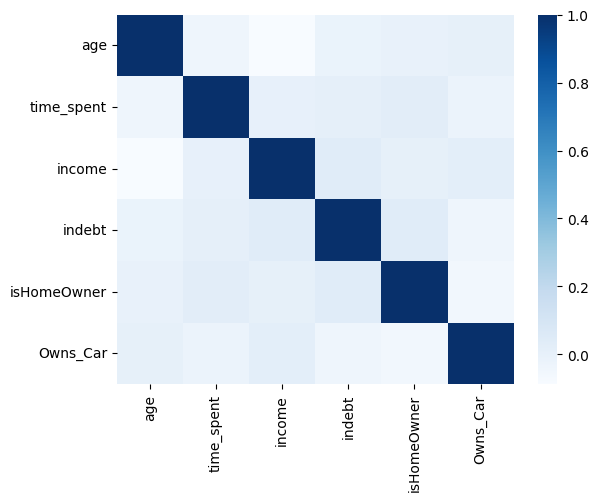

In [22]:
sns.heatmap(df[['age', 'time_spent', 'income', 'indebt', 'isHomeOwner', 'Owns_Car']].corr(), cmap='Blues')
plt.show()

#### Analysis:
- There’s a strong positive correlation between age and income. This suggests that as people get older, their income tends to increase. This could be due to factors like career progression and accumulation of experience.
- There’s a strong positive correlation between time spent and being in debt. This could indicate that the more time people spend on Social Media, the more likely they are to incur debt. This might be related to spending habits or lifestyle choices.
- There’s a notable correlation between income and being a homeowner. This suggests that higher income levels could lead to higher rates of home ownership.
- There’s a correlation between being in debt and owning a car. This could be due to the costs associated with car ownership, such as loans, maintenance, and insurance.

# Demographics Analysis

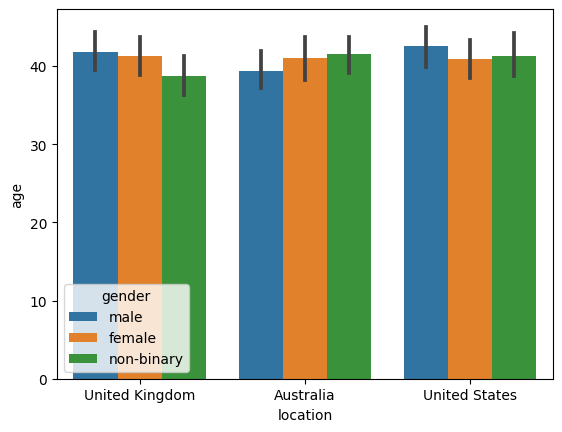

In [23]:
sns.barplot(data=df, y='age', x='location', hue='gender')
plt.show()

- The chart represents the age distribution by gender in three different locations: United Kingdom, Australia, and United States. It appears that the age distribution is fairly similar across all three locations for each gender.
- The chart includes data for males, females, and non-binary individuals. This suggests a diverse representation of genders in the data.
- The chart allows for a comparison of age distributions across different locations. This could be useful for understanding demographic differences or similarities between these locations.

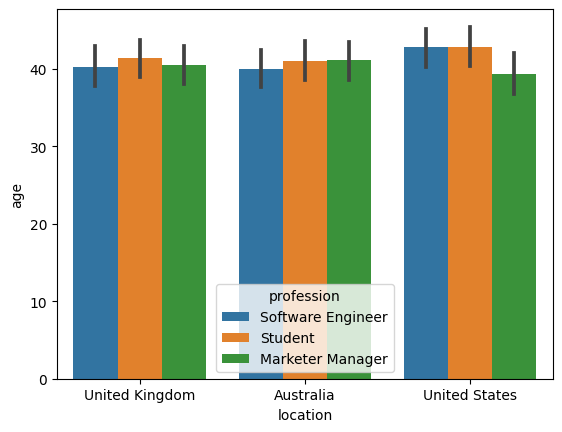

In [24]:
sns.barplot(data=df, y='age', x='location', hue='profession')
plt.show()

- The chart represents the age distribution across three different professions: Software Engineer, Student, and Marketer Manager. It appears that Students are generally younger than Software Engineers and Marketer Managers. This is consistent with the expectation that people often start as students before moving into professional roles.
- The age distributions for these professions are similar across the three locations: United Kingdom, Australia, and United States. This suggests that the age profiles for these professions are not significantly influenced by location.
- Among the professions, Marketer Managers tend to be older than Software Engineers, which could be due to the different career paths and progression rates in these fields.

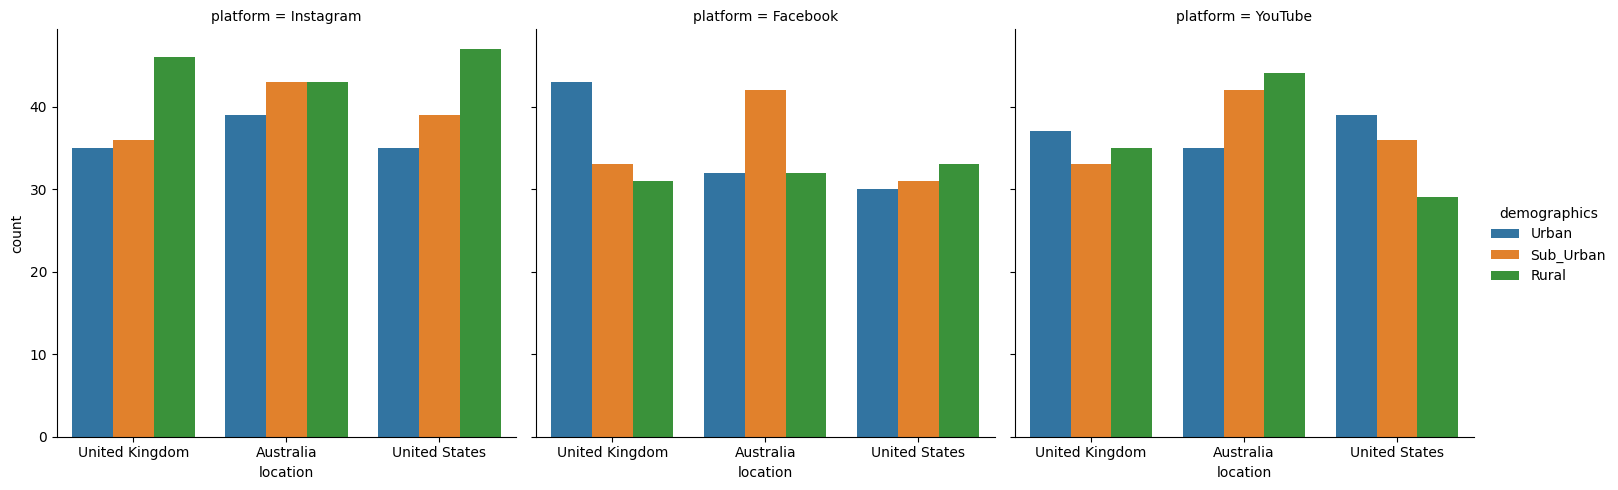

In [25]:
sns.catplot(data=df, x='location', hue='demographics', col='platform', kind='count')
plt.show()

#### Insights:
- The graph represents the count of demographics (Urban, Sub-Urban, and Rural) across three social media platforms (Instagram, Facebook, YouTube) in different locations (United Kingdom, Australia, United States). Instagram appears to have a higher user count across all demographics and locations compared to Facebook and YouTube.

#### Analysis:
- The Urban demographic dominates in all platforms and locations except for YouTube in the United States where Sub-Urban is highest. This could suggest that urban areas have better internet accessibility or lifestyle differences that make social media usage more prevalent.
- Instagram seems to be more popular among a broader audience, which could be due to its user-friendly interface, visual content, or other factors.

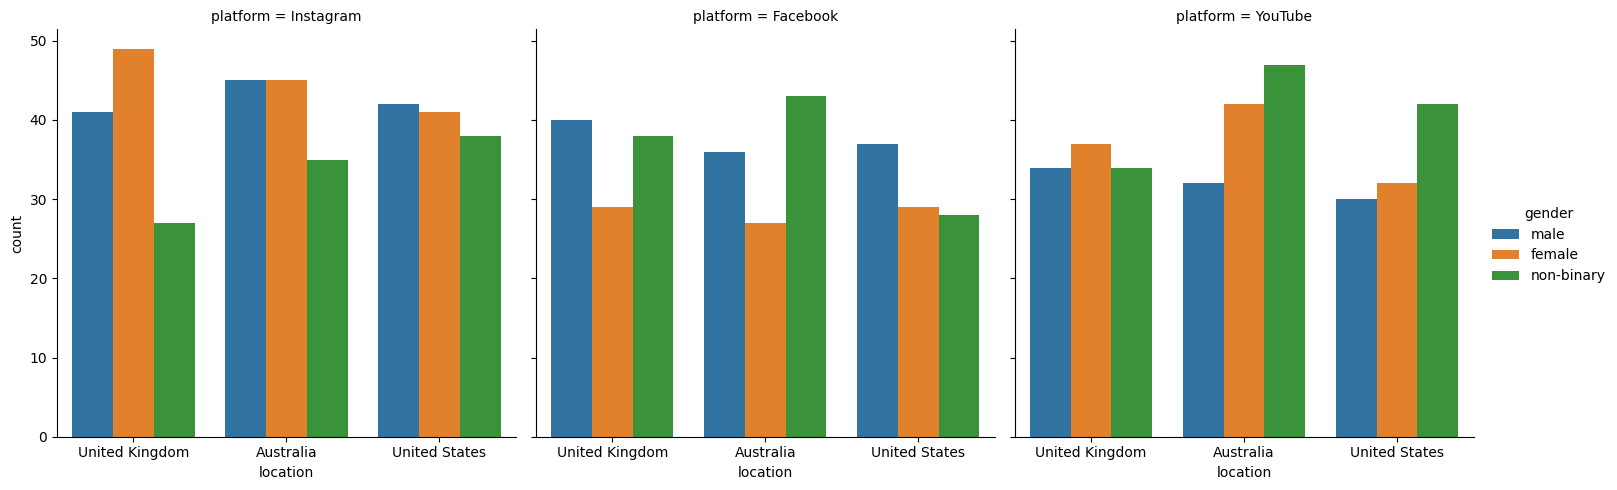

In [26]:
sns.catplot(data=df, col='platform', hue='gender', x='location', kind='count')
plt.show()

- Instagram:
    - United Kingdom: Female users outnumber male and non-binary users.
    - Australia: Female and male users are approximately equal in count, followed by non-binary users.
    - United States: Male users are the largest group, followed by female users, and then non-binary users.
- Facebook:
    - United Kingdom: Male users dominate, followed by non-binary users and then female users.
    - Australia: Non-binary users are the largest group, followed by male users and then female users.
    - United States: Male users are the largest group, followed by female users, and then non-binary users.
- YouTube:
    - United Kingdom: Female users are the largest group, followed by non-binary and then male users.
    - Australia: Non-binary users are the largest group, followed by female users and then male users.
    - United States: Non-binary users are the largest group, followed by female users and then male users.

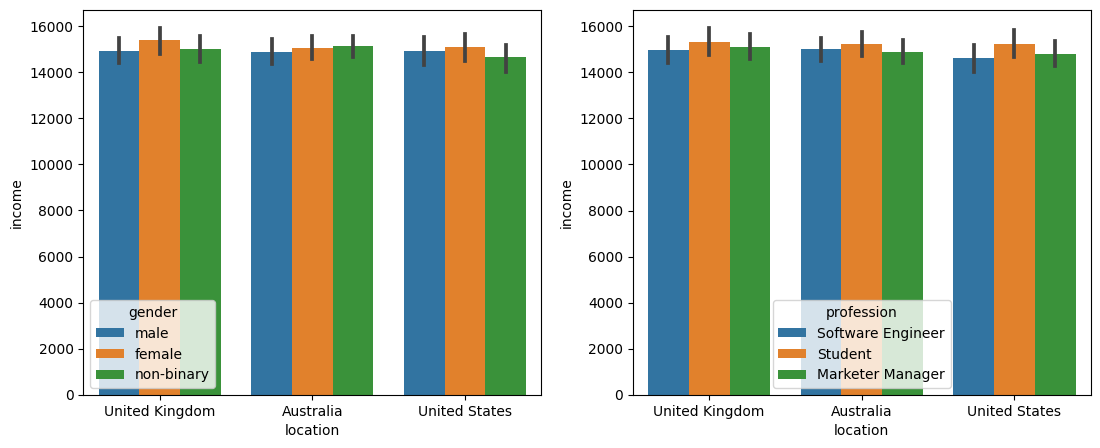

In [27]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.barplot(data=df, y='income', x='location', hue='gender')
plt.subplot(1,2,2)
sns.barplot(data=df, y='income', x='location', hue='profession')
plt.show()

#### Insights:
- The graph represents the count of different genders (male, female, non-binary) across three social media platforms (Instagram, Facebook, YouTube) in different locations (United Kingdom, Australia, United States). Instagram appears to have a higher user count across all genders and locations compared to Facebook and YouTube.

#### Analysis:
- Instagram seems to be more popular among a broader audience, which could be due to its user-friendly interface, visual content, or other factors. Facebook and YouTube also have significant user counts, but less than Instagram.

### Trends and Patterns:
- Consistent Age Distribution Across Locations and Genders: This suggests that age demographics may not vary significantly across these regions within the studied genders.
- Consistent Age Profiles for Professions Across Locations: The age distributions for the professions are similar across the three locations, suggesting that age profiles for these professions are not significantly influenced by location.
- **Urban** areas dominate in all platforms and locations, except for YouTube in the United States, where the **Sub-Urban** demographic is highest. 
- **Instagram** appears to be popular among a broader audience compared to Facebook and YouTube.
- Each platform (Instagram, Facebook, YouTube) exhibits distinct gender demographics across the studied locations, indicating varying preferences or usage patterns among different user groups. For example, Instagram's user base in the United Kingdom is dominated by females, while YouTube's user base in the United States is predominantly non-binary.

# Time Spent Analysis

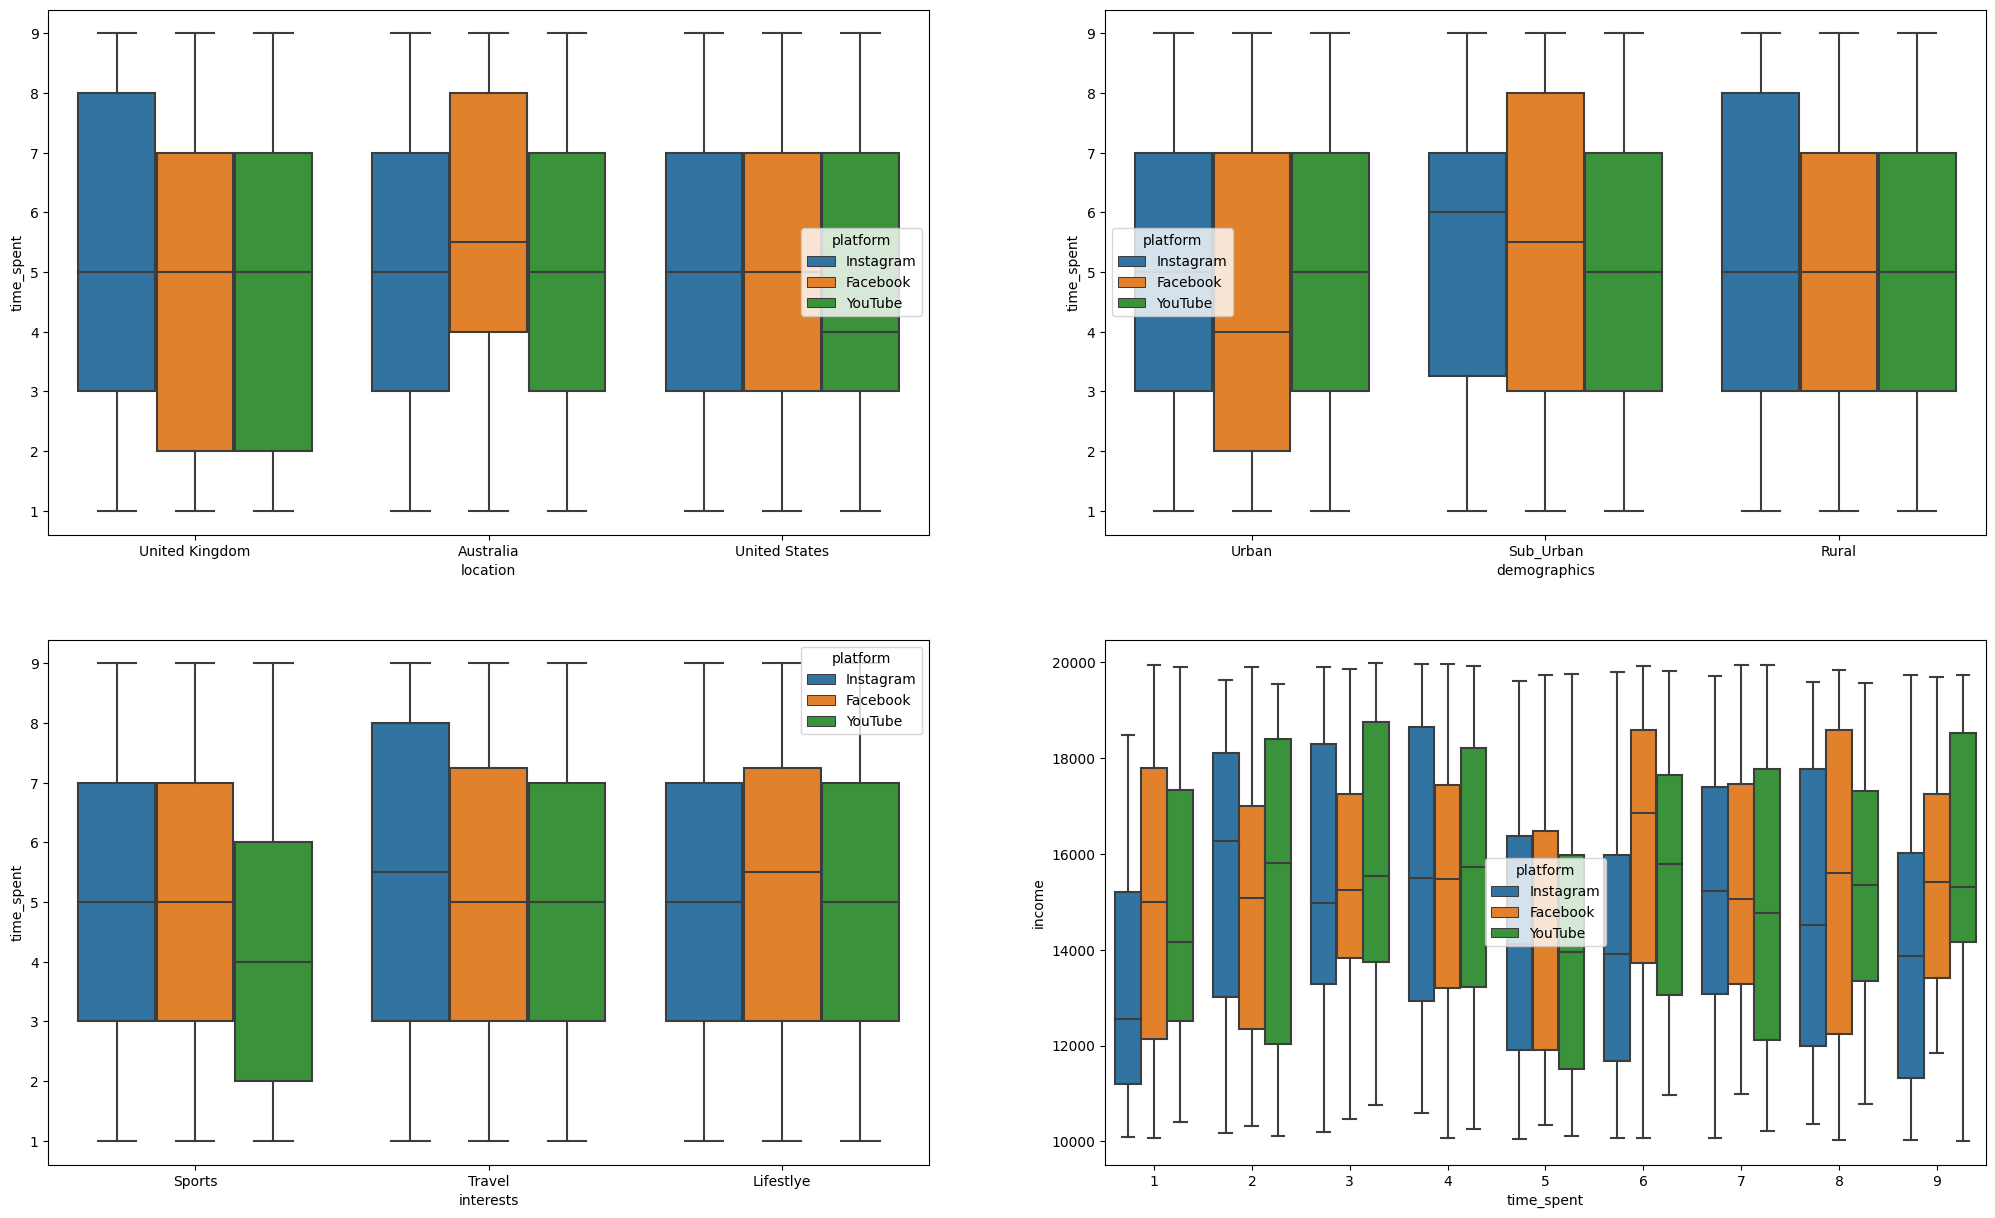

In [28]:
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
sns.boxplot(data=df, x='location', y='time_spent', hue='platform')
plt.subplot(2,2,2)
sns.boxplot(data=df, x='demographics', y='time_spent', hue='platform')
plt.subplot(2,2,3)
sns.boxplot(data=df, x='interests', y='time_spent', hue='platform')
plt.subplot(2,2,4)
sns.boxplot(data=df, y='income', x='time_spent', hue='platform')
plt.show()

### Analysis:
- Location:
    - UK: A larger proportion of users spend more time on Instagram in the UK compared to the other platforms.
    - Australia: A significant portion of users spend more time on Facebook in Australia compared to the other platforms.
    - USA: That there is no significant variation in time spent across these platforms in the USA.

- Demographics:
    - A significant portion of urban users spend less time on Facebook as compared to Instagram and YouTube.
    - Some Sub-Urban users spend slightly more time on Instagram and Mostly Users spends more time on Facebook than on Instagram and YouTube.
    - Rural users spends more time on Instagram. 

- Interests:
    - A significant portion of its users has relatively lower interest in sports compared to Instagram and Facebook users.
    - A larger proportion of Instagram users have a relatively higher interest in travel. Overall, Facebook users tend to have a higher interest in travel compared to YouTube users.
    - A larger proportion of Facebook users have a relatively higher interest in lifestyle compared to Instagram and YouTube users.

- Income:
    - The salary of users fluctuates for each platform over different usage time periods.
    - No single platform consistently has users with higher salaries.

# Analysis based on Interests:

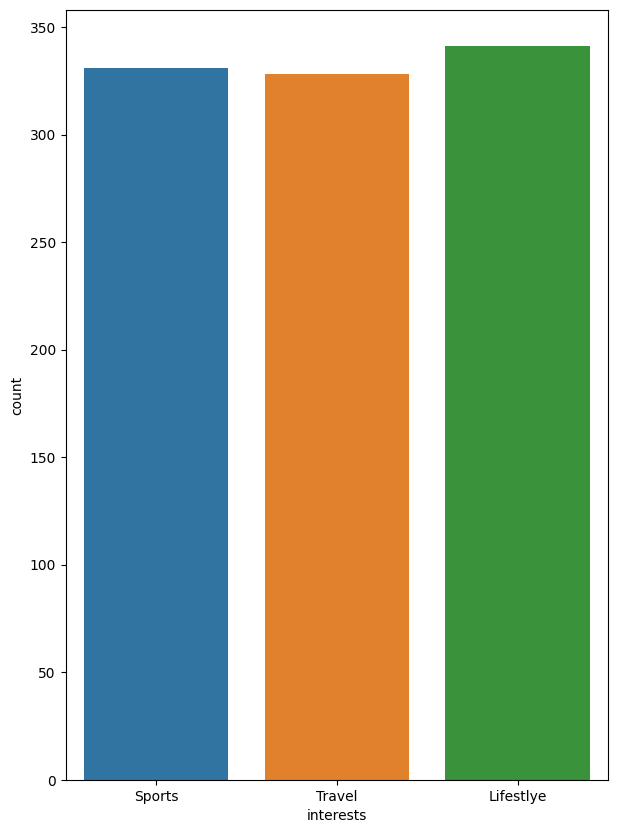

In [29]:
plt.figure(figsize=(7,10))
sns.countplot(data=df, x='interests')
plt.show()

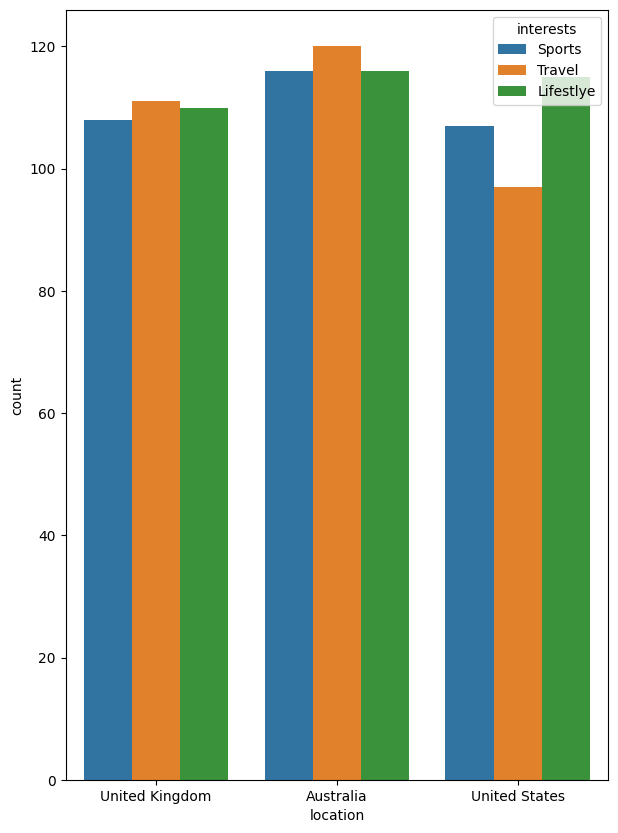

In [30]:
plt.figure(figsize=(7,10))
sns.countplot(data=df, x='location', hue='interests')
plt.show()

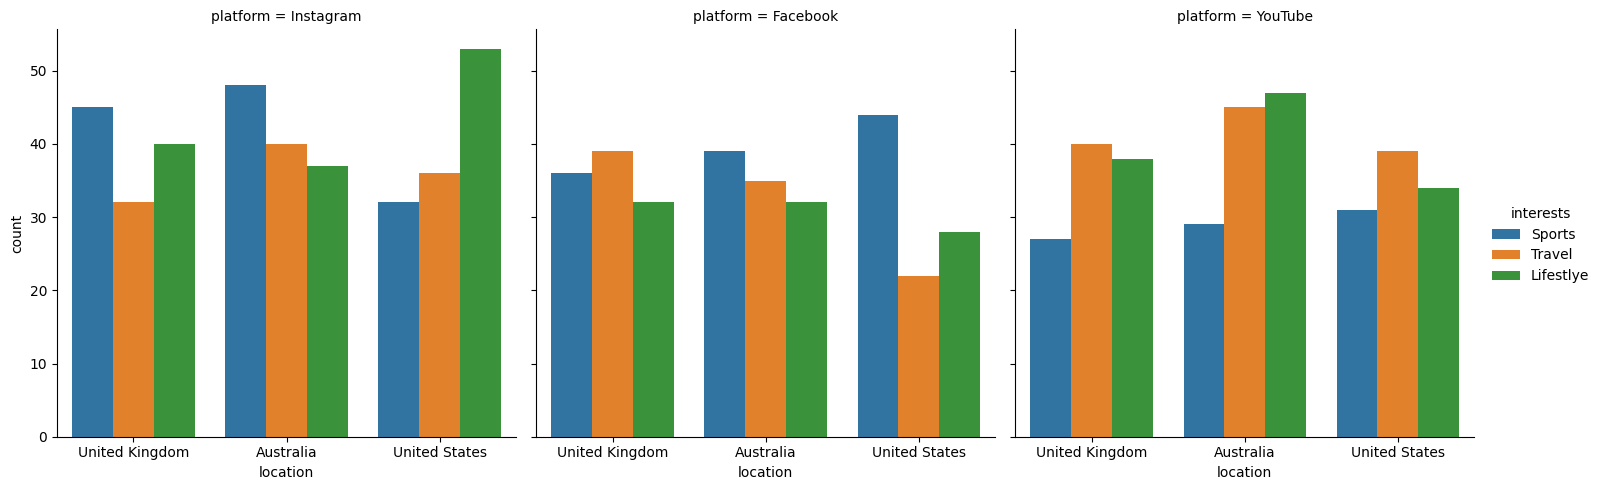

In [31]:
sns.catplot(data=df, col='platform', hue='interests', x='location', kind='count')
plt.show()

In [32]:
np.linspace(18, 64, 4)

array([18.        , 33.33333333, 48.66666667, 64.        ])

In [33]:
def age_group(x):
    if x<34:
        return 'Young'
    elif x>48:
        return 'Old'
    else:
        return 'Middle'

In [34]:
df['age_group']=df.age.apply(age_group)
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,age_group
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,1,0,0,Old
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,1,1,1,Middle
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,0,0,0,Young
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,0,1,0,Old
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,0,1,1,Young


In [35]:
np.linspace(10012, 19980, 4)

array([10012.        , 13334.66666667, 16657.33333333, 19980.        ])

In [36]:
def income_group(x):
    if x<13335:
        return 'lower'
    elif x>16657:
        return 'higher'
    else:
        return 'middle'

In [37]:
df['income_group']=df.income.apply(income_group)
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,age_group,income_group
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,1,0,0,Old,higher
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,1,1,1,Middle,lower
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,0,0,0,Young,lower
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,0,1,0,Old,lower
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,0,1,1,Young,middle


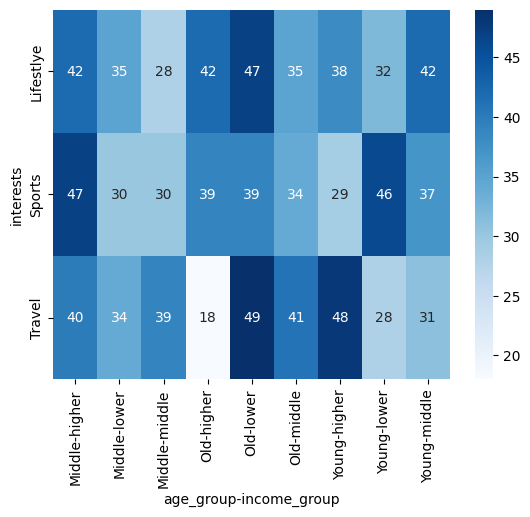

In [38]:
sns.heatmap(pd.crosstab(df.interests, [df.age_group, df.income_group]), annot=True, cmap='Blues')
plt.show()

**Overall Interest Analysis:**
- **Lifestyle:** It has the highest overall usage, indicating a widespread interest among users regardless of location or demographic.
- **Sports:** Follows Lifestyle in terms of usage, suggesting a significant portion of users engage with sports-related content.
- **Travel:** Although slightly lower than Lifestyle and Sports, Travel still garners substantial usage, indicating a considerable interest in travel-related content.

**Location-wise Analysis:**
- **Australia:** Shows a high interest in Travel and Sports, with Travel being the highest. This suggests that Australian users have a strong inclination towards travel and sports-related content.
- **United Kingdom:** Similar to Australia, users from the UK also show a significant interest in Travel and Sports.
- **United States:** Users from the US demonstrate the highest interest in Lifestyle content, followed by Australians. This suggests a preference for lifestyle-related content among users from these countries.

**Location-Platform Analysis:**
- **United States on Instagram for Lifestyle:** Indicates a strong engagement with lifestyle-related content, suggesting that Instagram is a popular platform for lifestyle content consumption among users in the US.
- **Australians on YouTube for Travel:** Shows a preference for consuming travel-related content on YouTube, indicating that Australians prefer this platform for travel-related content.
- **Australians and United Kingdom on Instagram for Sports:** Indicates that users from these countries favor Instagram for sports-related content consumption.

**Age-Income Analysis:**
- **Old age group with lower income belt for Travel:** This demographic segment demonstrates the highest interest in travel-related content, suggesting a desire for leisure and exploration despite lower income levels.
- **Middle age group with higher income belt for Sports:** Indicates a strong interest in sports-related content among middle-aged users with higher income levels, possibly indicating a willingness to spend on sports-related activities or events.
- **Old age group with lower income belt for Lifestyle:** This demographic segment shows the highest interest in lifestyle content, suggesting a desire for leisurely pursuits and lifestyle-related information despite limited financial resources.

In [39]:
pd.crosstab(df.interests, [df.profession, df.platform], margins=True, normalize=True)

profession Marketer Manager                   Software Engineer            \
platform           Facebook Instagram YouTube          Facebook Instagram   
interests                                                                   
Lifestlye             0.029     0.046   0.047             0.032     0.044   
Sports                0.047     0.047   0.027             0.032     0.047   
Travel                0.034     0.035   0.043             0.030     0.037   
All                   0.110     0.128   0.117             0.094     0.128   

profession          Student                      All  
platform   YouTube Facebook Instagram YouTube         
interests                                             
Lifestlye    0.029    0.031     0.040   0.043  0.341  
Sports       0.038    0.040     0.031   0.022  0.331  
Travel       0.047    0.032     0.036   0.034  0.328  
All          0.114    0.103     0.107   0.099  1.000

In [40]:
pd.crosstab(df.interests, [df.profession, df.platform], margins=True, normalize='index')

profession Marketer Manager                     Software Engineer            \
platform           Facebook Instagram   YouTube          Facebook Instagram   
interests                                                                     
Lifestlye          0.085044  0.134897  0.137830          0.093842  0.129032   
Sports             0.141994  0.141994  0.081571          0.096677  0.141994   
Travel             0.103659  0.106707  0.131098          0.091463  0.112805   
All                0.110000  0.128000  0.117000          0.094000  0.128000   

profession             Student                      
platform     YouTube  Facebook Instagram   YouTube  
interests                                           
Lifestlye   0.085044  0.090909  0.117302  0.126100  
Sports      0.114804  0.120846  0.093656  0.066465  
Travel      0.143293  0.097561  0.109756  0.103659  
All         0.114000  0.103000  0.107000  0.099000

In [41]:
pd.crosstab(df.interests, [df.profession, df.platform], margins=True, normalize='columns')

profession Marketer Manager                     Software Engineer            \
platform           Facebook Instagram   YouTube          Facebook Instagram   
interests                                                                     
Lifestlye          0.263636  0.359375  0.401709          0.340426  0.343750   
Sports             0.427273  0.367188  0.230769          0.340426  0.367188   
Travel             0.309091  0.273438  0.367521          0.319149  0.289062   

profession             Student                        All  
platform     YouTube  Facebook Instagram   YouTube         
interests                                                  
Lifestlye   0.254386  0.300971  0.373832  0.434343  0.341  
Sports      0.333333  0.388350  0.289720  0.222222  0.331  
Travel      0.412281  0.310680  0.336449  0.343434  0.328

- **Lifestyle (34.1%), Sports (33.1%), and Travel (32.8%)** which indicates a relatively balanced distribution of interests overall, with a slight skew towards Lifestyle.
- **Marketer Managers** with highest preference on Instagram (4.6%) and YouTube (4.7%). They also have significant interest in Sports, particularly on Facebook (4.7%) and Travel, especially on YouTube (4.3%).
- **Software Engineers** has a strong interest in Lifestyle, with Instagram (4.4%) being the preferred platform. Sports interest is notably high across platforms, with Instagram (4.7%) being the most preferred, followed by Facebook (4.7%). They also show considerable interest in Travel on YouTube (4.3%).
- **Students** exhibit a relatively balanced interest across platforms, with Lifestyle being the highest on YouTube (4.3%) and Sports being the highest on Facebook (4.7%). Travel interest is also distributed across platforms, with Instagram (4.0%) and YouTube (4.0%) being the preferred ones.Lifestyle (34.1%), Sports (33.1%), and Travel (32.8%) which indicates a relatively balanced distribution of interests overall, with a slight skew towards Lifestyle.

# Platform Usage Analysis:

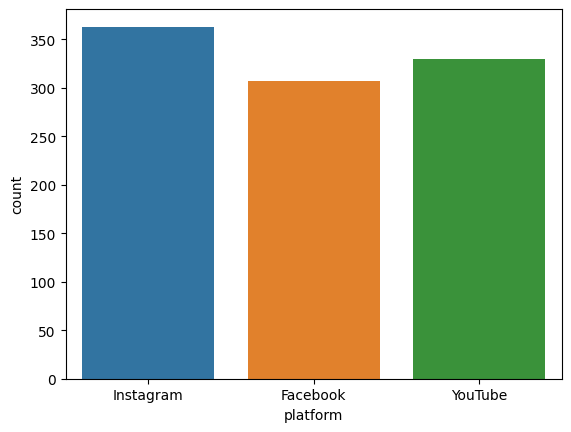

In [42]:
sns.countplot(data=df, x='platform')
plt.show()

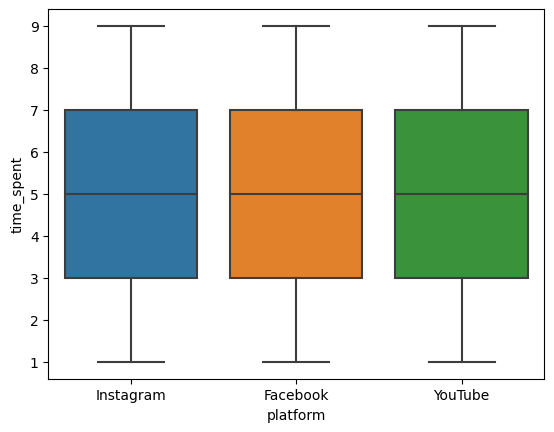

In [43]:
sns.boxplot(data=df, x='platform', y='time_spent')
plt.show()

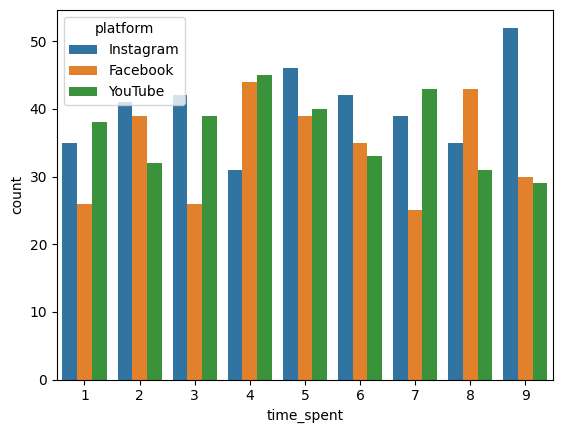

In [44]:
sns.countplot(data=df, hue='platform', x='time_spent')
plt.show()

- Instagram (Blue Bars): The count fluctuates across different time categories, peaking at times 4 and 9.
- Facebook (Green Bars): The count is consistently present across all time categories but does not reach as high as Instagram’s bars.
- YouTube (Orange Bars): The count is also consistent but generally shorter than both Instagram and Facebook’s bars, except at time 5 where it peaks.

In [45]:
pd.crosstab(df.platform, [df.location, df.demographics])

location     Australia                 United Kingdom                  \
demographics     Rural Sub_Urban Urban          Rural Sub_Urban Urban   
platform                                                                
Facebook            32        42    32             31        33    43   
Instagram           43        43    39             46        36    35   
YouTube             44        42    35             35        33    37   

location     United States                  
demographics         Rural Sub_Urban Urban  
platform                                    
Facebook                33        31    30  
Instagram               47        39    35  
YouTube                 29        36    39

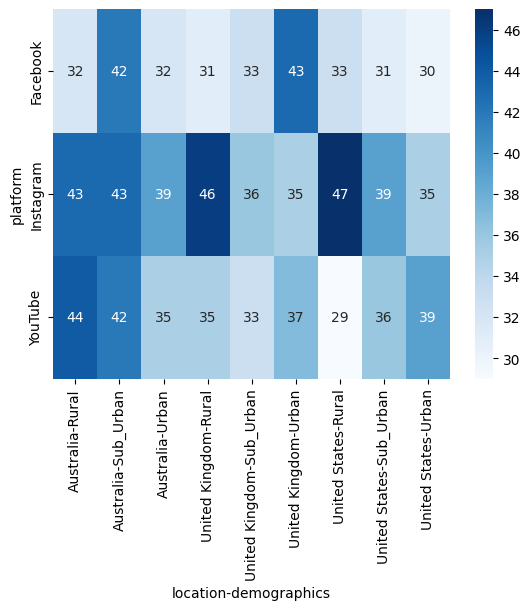

In [46]:
sns.heatmap(pd.crosstab(df.platform, [df.location, df.demographics]), annot=True, cmap='Blues')
plt.show()

In [47]:
pd.crosstab(df.platform, [df.location, df.demographics], margins=True, normalize=True)

location     Australia                  United Kingdom                   \
demographics     Rural Sub_Urban  Urban          Rural Sub_Urban  Urban   
platform                                                                  
Facebook         0.032     0.042  0.032          0.031     0.033  0.043   
Instagram        0.043     0.043  0.039          0.046     0.036  0.035   
YouTube          0.044     0.042  0.035          0.035     0.033  0.037   
All              0.119     0.127  0.106          0.112     0.102  0.115   

location     United States                     All  
demographics         Rural Sub_Urban  Urban         
platform                                            
Facebook             0.033     0.031  0.030  0.307  
Instagram            0.047     0.039  0.035  0.363  
YouTube              0.029     0.036  0.039  0.330  
All                  0.109     0.106  0.104  1.000

In [48]:
pd.crosstab(df.platform, [df.location, df.demographics], margins=True, normalize='index')

location     Australia                     United Kingdom                      \
demographics     Rural Sub_Urban     Urban          Rural Sub_Urban     Urban   
platform                                                                        
Facebook      0.104235  0.136808  0.104235       0.100977  0.107492  0.140065   
Instagram     0.118457  0.118457  0.107438       0.126722  0.099174  0.096419   
YouTube       0.133333  0.127273  0.106061       0.106061  0.100000  0.112121   
All           0.119000  0.127000  0.106000       0.112000  0.102000  0.115000   

location     United States                      
demographics         Rural Sub_Urban     Urban  
platform                                        
Facebook          0.107492  0.100977  0.097720  
Instagram         0.129477  0.107438  0.096419  
YouTube           0.087879  0.109091  0.118182  
All               0.109000  0.106000  0.104000

In [49]:
pd.crosstab(df.platform, [df.location, df.demographics], margins=True, normalize='columns')

location     Australia                     United Kingdom                      \
demographics     Rural Sub_Urban     Urban          Rural Sub_Urban     Urban   
platform                                                                        
Facebook      0.268908  0.330709  0.301887       0.276786  0.323529  0.373913   
Instagram     0.361345  0.338583  0.367925       0.410714  0.352941  0.304348   
YouTube       0.369748  0.330709  0.330189       0.312500  0.323529  0.321739   

location     United States                        All  
demographics         Rural Sub_Urban     Urban         
platform                                               
Facebook          0.302752  0.292453  0.288462  0.307  
Instagram         0.431193  0.367925  0.336538  0.363  
YouTube           0.266055  0.339623  0.375000  0.330

- **Instagram Dominance:** Instagram is the most popular social media platform overall, with a usage rate of 36.3%. Additionally, the higher usage rates among rural users in the United States(12.95%), United Kingdom(2.67%), and suburban users in Australia indicate specific demographic preferences or behaviors towards social media engagement at 11.84%.
- **YouTube Follows:** YouTube has a substantial user base, with a usage rate of approximately 33.0%, closely following Instagram's dominance. The data also highlights specific demographic preferences, with rural users in Australia showing the highest usage at 13.33%, followed by suburban users in Australia, urban users in the United States, and urban users in the United Kingdom, with usage rates of 12.72%, 11.81%, and 11.21% respectively.
- **Facebook Usage:** Facebook's usage percentage is lower compared to Instagram and YouTube, it still holds a significant portion of the overall usage, accounting for approximately 30.7%. Specifically, among urban users in the United Kingdom and suburban users in Australia, Facebook's usage is relatively higher, standing at 14% and 13.68% respectively.
- **Note:** While certain demographics consistently favor specific platforms, there are notable differences in platform preferences based on demographics. For instance, in urban areas of the United Kingdom, Facebook is preferred with a usage rate of 37.39%. Additionally, Australia's rural demographic prefers Instagram with 41%. The United States prefers Instagram and YouTube, respectively, showcasing the diversity in platform preferences across different demographic segments.

# Financial Analysis